## Simple COVID-19 Dashboard

Using offical data from the government Covid-19 API, I have compiled a few simple comparisons which can give us a better understanding of trends and statistics throughout the pandemic.

In [1]:
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from uk_covid19 import Cov19API

In [2]:
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 150

In [3]:
with open("RegNewcComp.json", "rt") as INFILE: # Loading file
    Regdata=json.load(INFILE)

def parse_date(datestring):
    return pd.to_datetime(datestring, format="%Y-%m-%d") # Correct pandas date format
    
    
def reg_wrangle_data(Regdata):
    #Working out Date Range
    Regdata=Regdata['data']
    dates=[dictionary['Date'] for dictionary in Regdata]
    dates.sort()
    startdate=parse_date(dates[0]) 
    enddate=parse_date(dates[-1])
    index=pd.date_range(startdate, enddate, freq='D')

    #Dates are still the index
    NorthW_df = pd.DataFrame(index=index, columns=['tests','NewCases'])
    YandH_df= pd.DataFrame(index=index, columns=['tests','NewCases'])
    EastM_df= pd.DataFrame(index=index, columns=['tests','NewCases'])
    Ldn_df= pd.DataFrame(index=index, columns=['tests','NewCases'])
    SouthW_df= pd.DataFrame(index=index, columns=['tests','NewCases'])
    NorthE_df= pd.DataFrame(index=index, columns=['tests','NewCases'])
    WestM_df= pd.DataFrame(index=index, columns=['tests','NewCases'])
    EofE_df= pd.DataFrame(index=index, columns=['tests','NewCases'])
    SouthE_df= pd.DataFrame(index=index, columns=['tests','NewCases'])

    #Filling Dataframes

    #Defining a Dataframe list to simplify plotting and blank filling later
    regdf_list = [NorthW_df, YandH_df, EastM_df, Ldn_df, SouthW_df, NorthE_df, WestM_df, EofE_df, SouthE_df]

    for entry in Regdata: # Funneling the correct data into the correct frame
        region = entry['Region'] # Highlighting the region of that particular entry and then tranferring the corresponding data to the appropriate Dataframe
        if region == 'North West':
            for column in ['tests','NewCases']:
                date=parse_date(entry['Date'])
                if pd.isna(NorthW_df.loc[date, column]):
                    value= float(entry[column]) if entry[column]!=None else 0.0
                    NorthW_df.loc[date, column]=value
        if region == 'Yorkshire and The Humber':
            for column in ['tests','NewCases']:
                date=parse_date(entry['Date'])
                if pd.isna(YandH_df.loc[date, column]):
                    value= float(entry[column]) if entry[column]!=None else 0.0
                    YandH_df.loc[date, column]=value
        if region == 'East Midlands':
            for column in ['tests','NewCases']:
                date=parse_date(entry['Date'])
                if pd.isna(EastM_df.loc[date, column]):
                    value= float(entry[column]) if entry[column]!=None else 0.0
                    EastM_df.loc[date, column]=value
        if region == 'London':
            for column in ['tests','NewCases']:
                date=parse_date(entry['Date'])
                if pd.isna(Ldn_df.loc[date, column]):
                    value= float(entry[column]) if entry[column]!=None else 0.0
                    Ldn_df.loc[date, column]=value
        if region == 'South West':
            for column in ['tests','NewCases']:
                date=parse_date(entry['Date'])
                if pd.isna(SouthW_df.loc[date, column]):
                    value= float(entry[column]) if entry[column]!=None else 0.0
                    SouthW_df.loc[date, column]=value
        if region == 'North East':
            for column in ['tests','NewCases']:
                date=parse_date(entry['Date'])
                if pd.isna(NorthE_df.loc[date, column]):
                    value= float(entry[column]) if entry[column]!=None else 0.0
                    NorthE_df.loc[date, column]=value
        if region == 'West Midlands':
            for column in ['tests','NewCases']:
                date=parse_date(entry['Date'])
                if pd.isna(WestM_df.loc[date, column]):
                    value= float(entry[column]) if entry[column]!=None else 0.0
                    WestM_df.loc[date, column]=value
        if region == 'East of England':
            for column in ['tests','NewCases']:
                date=parse_date(entry['Date'])
                if pd.isna(EofE_df.loc[date, column]):
                    value= float(entry[column]) if entry[column]!=None else 0.0
                    EofE_df.loc[date, column]=value
        if region == 'South East':
            for column in ['tests','NewCases']:
                date=parse_date(entry['Date'])
                if pd.isna(SouthE_df.loc[date, column]):
                    value= float(entry[column]) if entry[column]!=None else 0.0
                    SouthE_df.loc[date, column]=value
    return regdf_list
    
regdf_list=reg_wrangle_data(Regdata)

reg_count=0
for reg in regdf_list: # for every region dataframe in our list
    regdf_list[reg_count].fillna(0.0, inplace=True) # Fill in the blanks
    reg_count+=1 # Move onto next region df in next iteration

In [4]:
with open("EngStatsComp.json", "rt") as INFILE: # Loading file
    Engdata=json.load(INFILE)

    
plt.rcParams['figure.dpi'] = 125
#Data Wrangling Engdata
def eng_wrangle_data(Engdata): #Same pricipal as before for days
    datalist=Engdata['data']
    dates=[dictionary['Date'] for dictionary in datalist ]
    dates.sort()
    startdate=parse_date(dates[0]) 
    enddate=parse_date(dates[-1])

    index=pd.date_range(startdate, enddate, freq='D') # This time only 1 region hence 1 dataframe
    EngStats_df = pd.DataFrame(index=index, columns=['Tests', 'Cases', 'Deaths','Admissions','FirstVaccinations','SecondVaccinations','BoosterVaccinations'])

    for entry in datalist: # each entry is a dictionary with date, cases, admissions, deaths & their cumulative vaccination values
        date=parse_date(entry['Date'])
        for column in ['Tests', 'Cases', 'Deaths','Admissions','FirstVaccinations','SecondVaccinations','BoosterVaccinations']:
            if pd.isna(EngStats_df.loc[date, column]):
                value= float(entry[column]) if entry[column]!=None else 0.0
                EngStats_df.loc[date, column]=value
    return EngStats_df

EngStats_df= eng_wrangle_data(Engdata)
EngStats_df.fillna(0.0, inplace=True)
EngStats_df.to_pickle("EngStatsComp.pkl") # Save to pkl

In [5]:
def reg_access_api(): #API access for Regional data
    """ Accesses the PHE API. Returns raw data in the same format as data loaded from the "canned" JSON file. """
    filters = [
        'areaType=region'
    ]

    structure = {
        "Region":"region",
        "Date":"date",
        "tests": "cumPCRTestsBySpecimenDate",
        "NewCases": "newCasesByPublishDate",
    }

    api = Cov19API(filters=filters,structure=structure)
    RegNewcComp = api.get_json()
    return {RegNewcComp} # return data read from the API

In [6]:
def eng_access_api(): # API access for England statistics
    filters = [
        'areaType=nation',
        'areaName=England'
    ]

    structure = {
        "Date": "date",
        "Tests":"newTestsByPublishDate",
        "Cases":"newCasesByPublishDate",
        "Deaths":"newDeaths28DaysByPublishDate",
        "Admissions": "newAdmissions",
        "FirstVaccinations":"cumPeopleVaccinatedFirstDoseByPublishDate",
        "SecondVaccinations":"cumPeopleVaccinatedSecondDoseByPublishDate",
        "BoosterVaccinations":"cumPeopleVaccinatedThirdInjectionByPublishDate",
    }

    api = Cov19API(filters=filters,structure=structure)
    EngStatsComp = api.get_json()
    return {EngStatsComp}

## Comparison of Tests and New Cases by Region

This is a comparison of the rate of testing alongside daily new cases broken down by each region in England. This is useful when identifying trends which separate the rate at which people got infected.

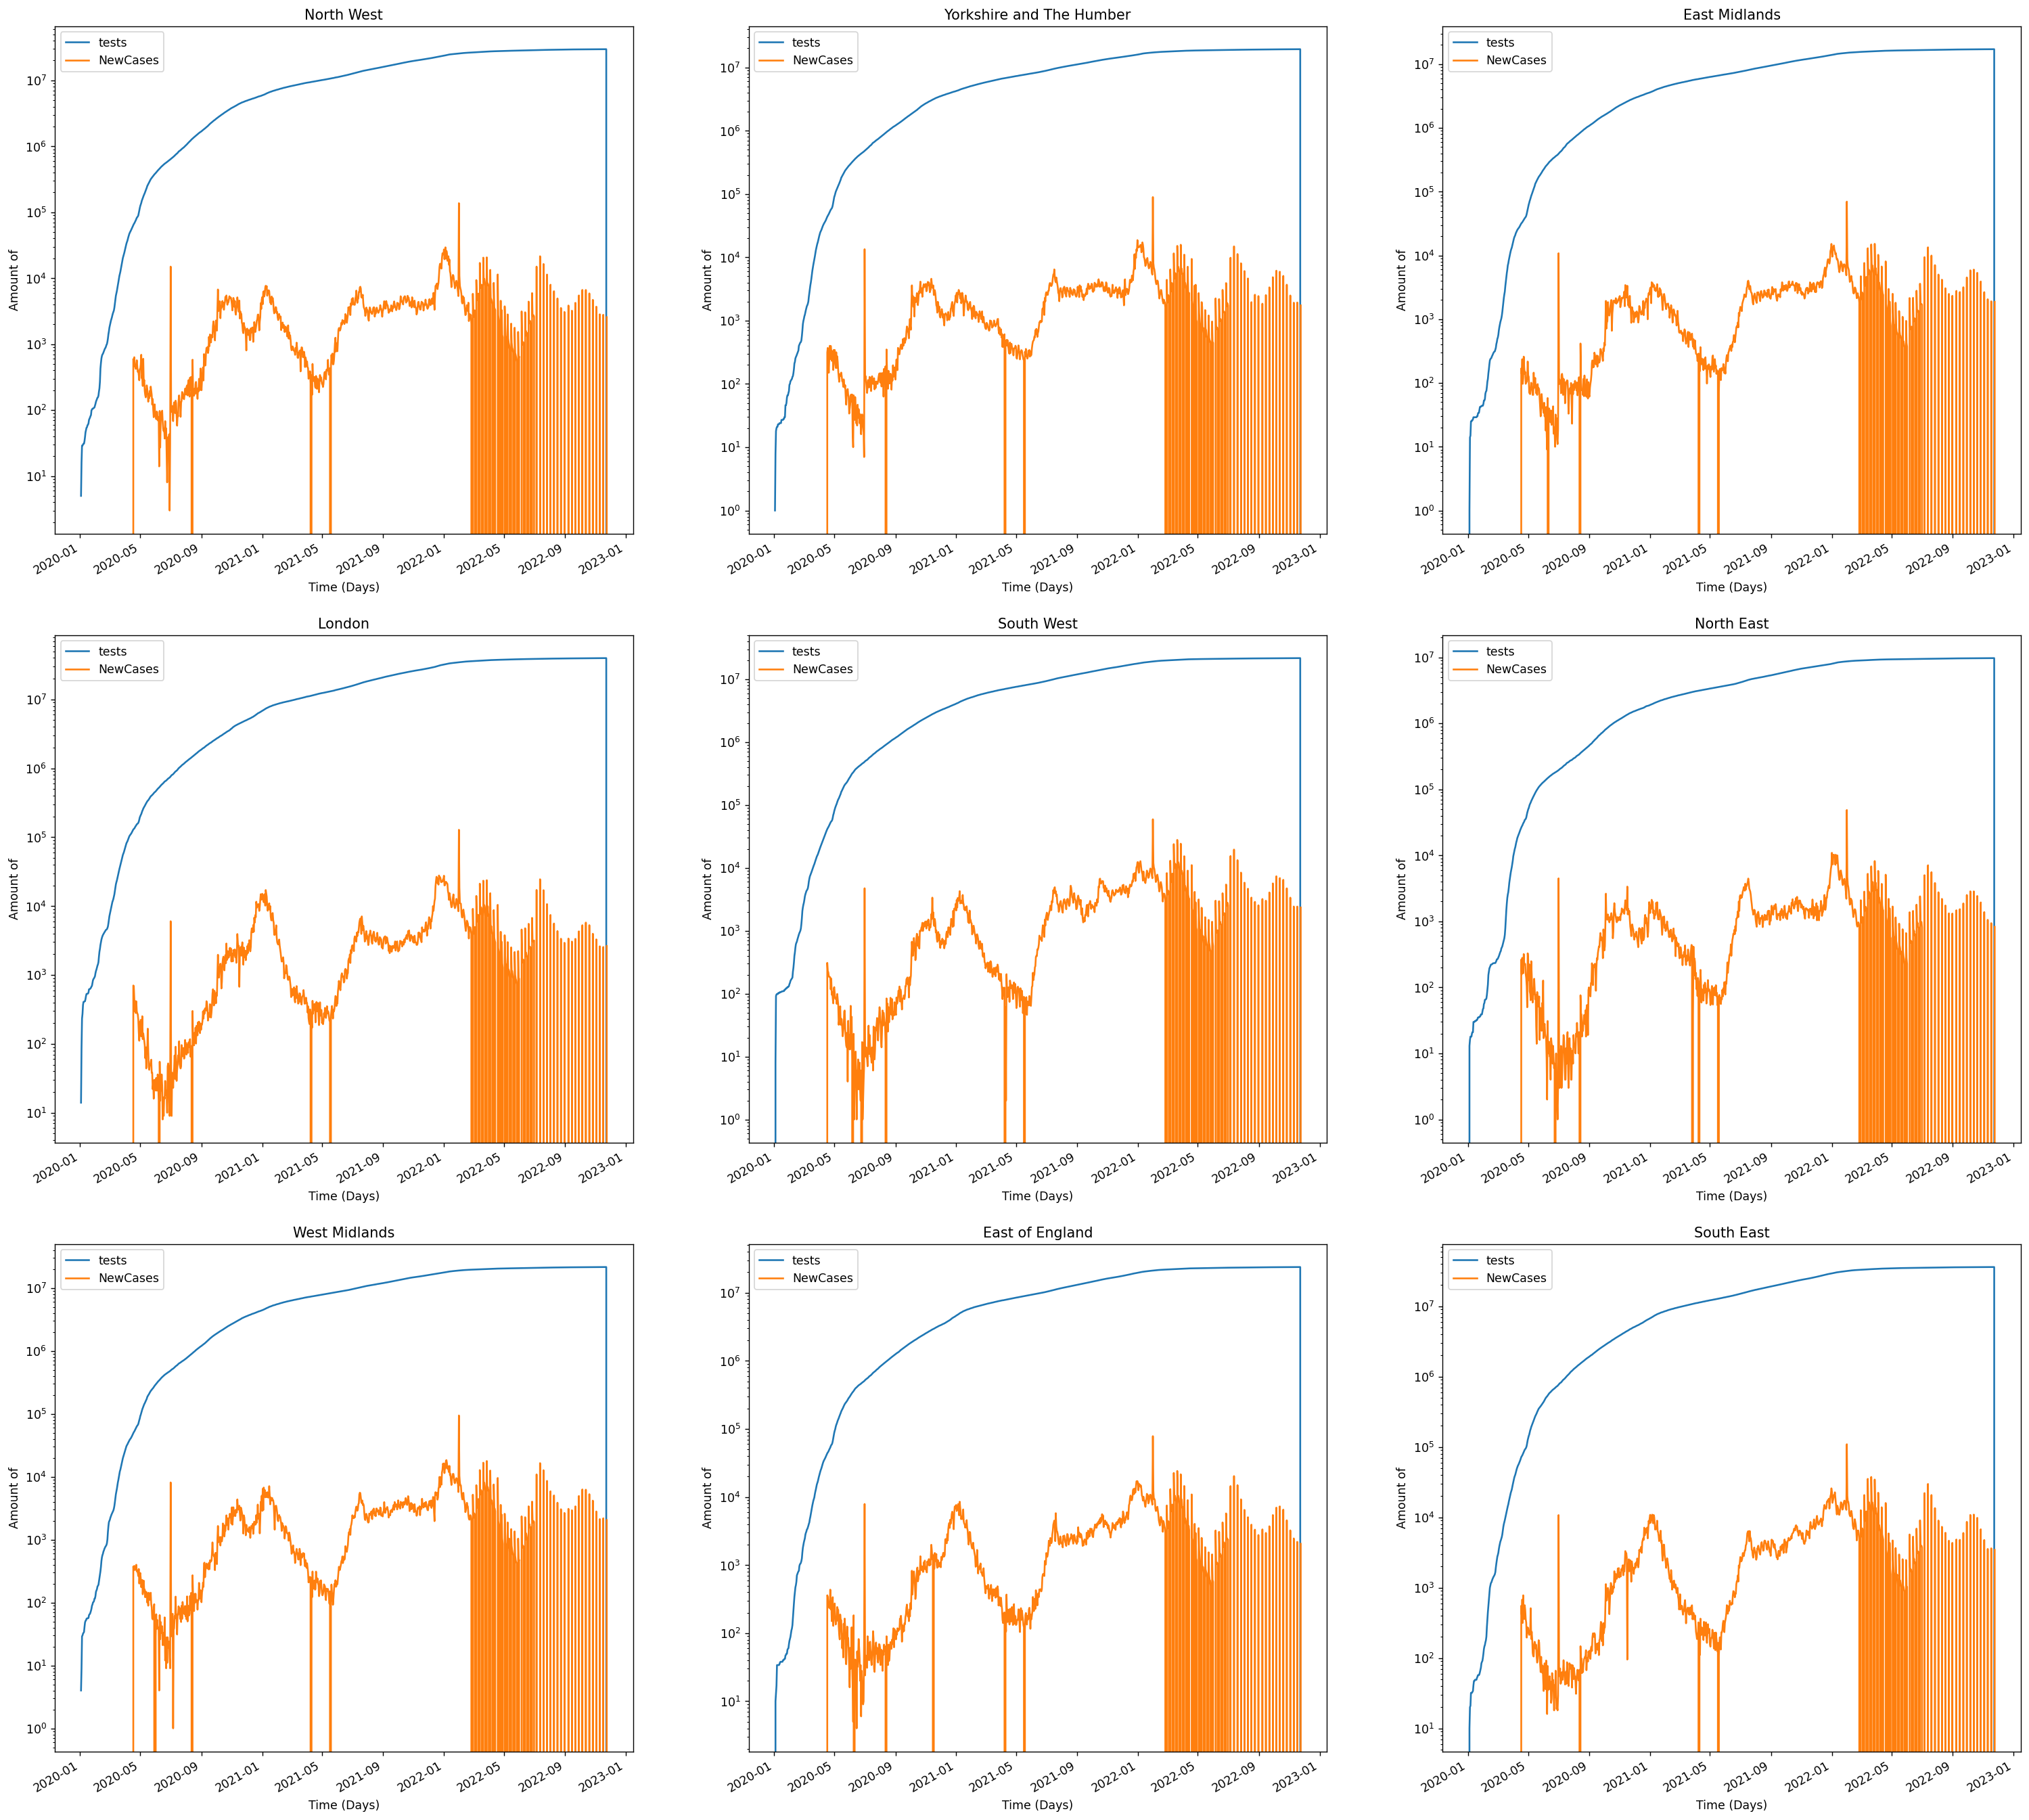

In [9]:
def plot_regcomp(regdf_list):
    nrows=3
    ncols=3
    fig, axes = plt.subplots(nrows, ncols, figsize = (30,30)) #ncols and nrows variables to set up empty plots, figsize trial and error to find best presentation format
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    
    reg_count=0
    for x in range(nrows): # Faster than manual line by line plotting where the regions in the list are mapped accordingly in the following incraments [0,0],[0,1]...[2,2]
        for y in range(ncols):
            regdf_list[reg_count].plot(ax=axes[x,y], logy=True, x_compat=True , xlabel="Time (Days)", ylabel="Amount of") #x_compat to get rid of mixed word/num date format, labelling both axes
            reg_count+=1
    axes[0,0].set_title("North West")
    axes[0,1].set_title("Yorkshire and The Humber")
    axes[0,2].set_title("East Midlands")
    axes[1,0].set_title("London")
    axes[1,1].set_title("South West")
    axes[1,2].set_title("North East")
    axes[2,0].set_title("West Midlands")
    axes[2,1].set_title("East of England")
    axes[2,2].set_title("South East")
    plt.show()

plot_regcomp(regdf_list)

In [7]:
def api_regbutton_callback(button):
    # Get fresh data from the API. If you have time, include some error handling
    # around this call.
    apidata=reg_access_api()
    global df_list
    df_list=reg_wrangle_data(apidata)
    # the graph won't refresh until the user interacts with the widget.
    refresh_graph()
    # after all is done, you can switch the icon on the button to a "check" sign
    # and optionally disable the button - it won't be needed again. You can use icons
    # "unlink" or "times" and change the button text to "Unavailable" in case the 
    # api call fails.
    apibutton.icon="check"
    # apibutton.disabled=True
    
apibutton=wdg.Button(
    description='Refresh Regional Data', # you may want to change this...
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip="Refresh the data for the Regional graphs",
    # FontAwesome names without the `fa-` prefix - try "download"
    icon='bullhorn'
)

apibutton.on_click(api_regbutton_callback) # on click retrieve updated data for regions and refresh the graph

display(apibutton)

Button(button_style='info', description='Refresh Regional Data', icon='bullhorn', style=ButtonStyle(), tooltip…

## Comparison of all main statistics in England

This is a time comparison of the major statistics in England only. To compare the changing statistics to the cumulative ones i.e. vaccines, use the multiple selection field alongside the scale respectively.

In [10]:
series=wdg.SelectMultiple(
    options=['Tests', 'Cases', 'Deaths','Admissions','FirstVaccinations','SecondVaccinations','BoosterVaccinations'],
    value=['Tests', 'Cases', 'Deaths','Admissions','FirstVaccinations','SecondVaccinations','BoosterVaccinations'],
    rows=7,
    description='Statistics:',
    disabled=False
)

scale=wdg.Dropdown(
    options=['Linear', 'Log'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Scale:',
    disabled=False
)

controls=wdg.HBox([series, scale])

def plot_engstats(gcols, gscale):
    if gscale=='Linear': # Adjusting for both Linear and Log views
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        EngStats_df[list(gcols)].plot(logy=logscale, x_compat=True, xlabel="Time (Days)", ylabel="Amount of").set_title("Time Comparison in England")
        plt.show() # important - graphs won't update if this is missing 
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")
        
graph=wdg.interactive_output(plot_engstats, {'gcols': series, 'gscale': scale})
display(controls, graph)

def refresh_graph():
    current=scale.value
    if current==scale.options[0]:
        other=scale.options[1]
    else:
        other=scale.options[0]
    scale.value=other # forces the redraw
    scale.value=current # now we can change it back


Output()

In [8]:
def api_engbutton_callback(button):
    apidata=eng_access_api()
    global df
    df=eng_wrangle_data(apidata)
    refresh_graph()
    apibutton.icon="check"
    
apibutton=wdg.Button(
    description='Refresh England Data', # you may want to change this...
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip="Refresh the data for the Timeseries in Enlgand graph",
    # FontAwesome names without the `fa-` prefix - try "download"
    icon='bullhorn'
)

apibutton.on_click(api_engbutton_callback) # on click retrieve updated data for England and refresh the graph

display(apibutton)

Button(button_style='info', description='Refresh England Data', icon='bullhorn', style=ButtonStyle(), tooltip=…